In [2]:
import psycopg2
import pandas as pd
conn=psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)

Average discounted price per Category

C:\Users\anshi\AppData\Local\Temp\ipykernel_182528\932744273.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


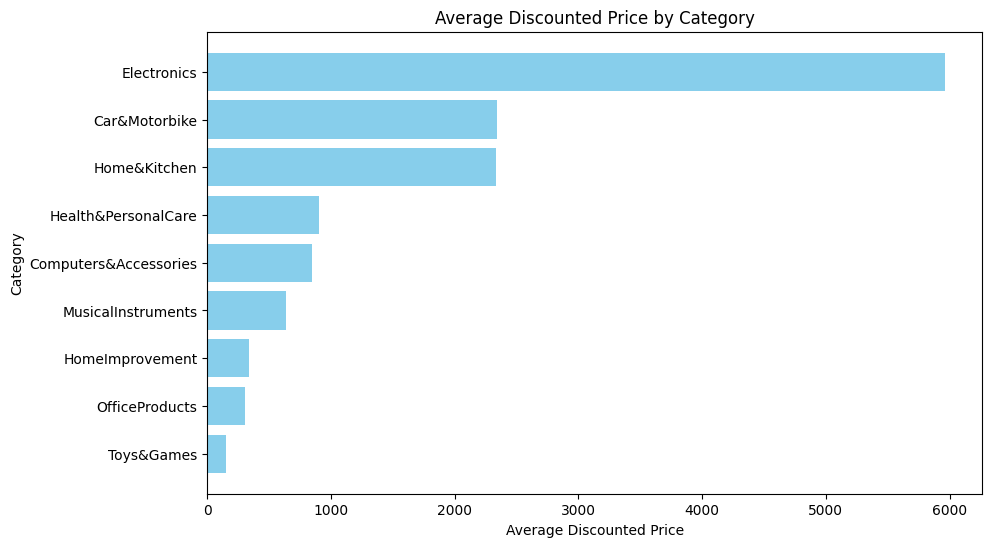

        trimmed_category          avg
0            Electronics  5965.887833
1          Car&Motorbike  2339.000000
2           Home&Kitchen  2330.615647
3    Health&PersonalCare   899.000000
4  Computers&Accessories   842.650375
5     MusicalInstruments   638.000000
6        HomeImprovement   337.000000
7         OfficeProducts   301.580645
8             Toys&Games   150.000000


In [11]:
import psycopg2
import pandas as pd
conn=psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)
query = """SELECT 
    regexp_replace(Category, '\|.*$', '') AS trimmed_category,
    AVG(CAST(discounted_price AS FLOAT)) AS avg
FROM amazon_sales
GROUP BY trimmed_category
ORDER BY avg DESC;
"""

df=pd.read_sql(query,conn)
conn.close()

import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(10,6))
plt.barh(df['trimmed_category'], df['avg'], color='skyblue')
plt.xlabel('Average Discounted Price')
plt.ylabel('Category')
plt.title('Average Discounted Price by Category')
plt.gca().invert_yaxis()  # so highest is at the top
plt.show()

print(df)

Average discount percentage per category

        trimmed_category  avg_discount
0        HomeImprovement     57.500000
1  Computers&Accessories     54.024283
2    Health&PersonalCare     53.000000
3            Electronics     50.828897
4     MusicalInstruments     46.000000
5          Car&Motorbike     42.000000
6           Home&Kitchen     40.120536
7         OfficeProducts     12.354839
8             Toys&Games      0.000000


C:\Users\anshi\AppData\Local\Temp\ipykernel_182528\1411385560.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


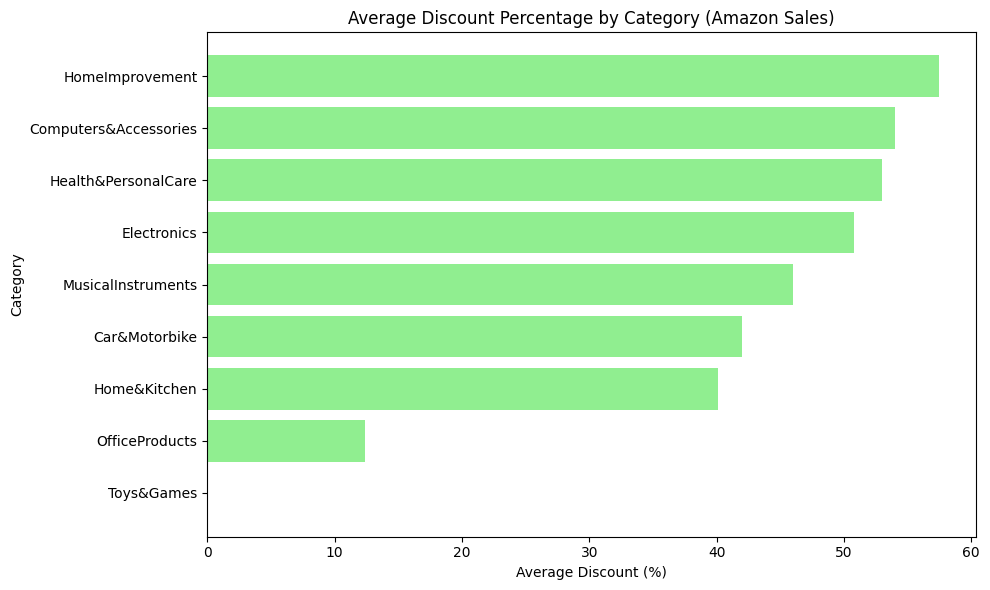

In [21]:
import psycopg2
import pandas as pd
conn=psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)
query="""SELECT regexp_replace(Category, '\|.*$', '') AS trimmed_category, AVG(CAST(discount_percentage AS FLOAT)) AS avg_discount
FROM amazon_sales
GROUP BY trimmed_category
ORDER BY avg_discount DESC;"""
df=pd.read_sql(query,conn)
conn.close()
print(df)
plt.figure(figsize=(10, 6))
plt.barh(df['trimmed_category'], df['avg_discount'], color='lightgreen')
plt.xlabel('Average Discount (%)')
plt.ylabel('Category')
plt.title('Average Discount Percentage by Category (Amazon Sales)')
plt.gca().invert_yaxis()  # highest discount at the top
plt.tight_layout()
plt.show()

Top 10 products with highest discount

                                        product_name  discount_percentage
0  rts [2 Pack] Mini USB C Type C Adapter Plug, T...                   94
1  Fire-Boltt Ninja Call Pro Plus 1.83 Smart Watc...                   91
2  Fire-Boltt Ninja Call Pro Plus 1.83 Smart Watc...                   91
3  Fire-Boltt Ninja Call Pro Plus 1.83 Smart Watc...                   91
4  Fire-Boltt Ninja Call Pro Plus 1.83 Smart Watc...                   91
5  Fire-Boltt Ninja Call Pro Plus 1.83 Smart Watc...                   91
6  Sounce Fast Phone Charging Cable & Data Sync U...                   90
7  Sounce Spiral Charger Cable Protector Data Cab...                   90
8  Sounce Protective Case Cover Compatible Boat X...                   90
9  LAPSTER 12pcs Spiral Cable Protectors for Char...                   90


C:\Users\anshi\AppData\Local\Temp\ipykernel_182528\3455946611.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


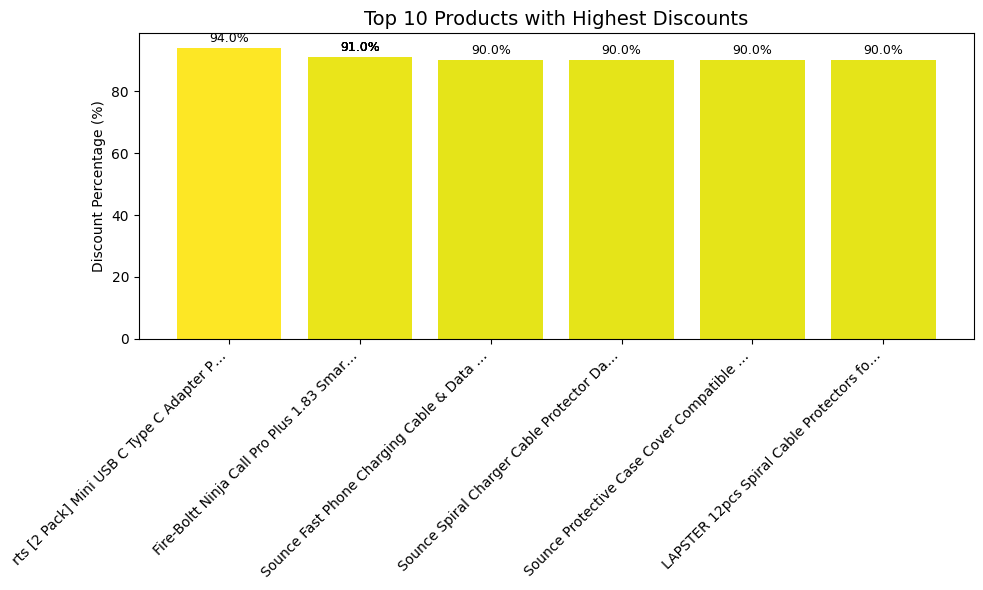

In [20]:

import psycopg2
import pandas as pd
conn=psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)
query="""SELECT product_name, discount_percentage
FROM amazon_sales
ORDER BY CAST(discount_percentage AS FLOAT) DESC
LIMIT 10;
"""

df=pd.read_sql(query,conn)
conn.close()
print(df)
df['product_name'] = df['product_name'].apply(
    lambda x: (x[:40] + '…') if len(x) > 40 else x
)
import numpy as np

plt.figure(figsize=(10, 6))
bars = plt.bar(df['product_name'], df['discount_percentage'], color=plt.cm.viridis(df['discount_percentage'] / max(df['discount_percentage'])))
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Products with Highest Discounts', fontsize=14)
plt.ylabel('Discount Percentage (%)')

# Add gradient + values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


B. Ratings Analysis

Average rating per category

        trimmed_category  avg_rating
0         OfficeProducts    4.309677
1             Toys&Games    4.300000
2        HomeImprovement    4.250000
3  Computers&Accessories    4.154967
4            Electronics    4.081749
5           Home&Kitchen    4.031696
6    Health&PersonalCare    4.000000
7     MusicalInstruments    3.900000
8          Car&Motorbike    3.800000


C:\Users\anshi\AppData\Local\Temp\ipykernel_182528\678789630.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


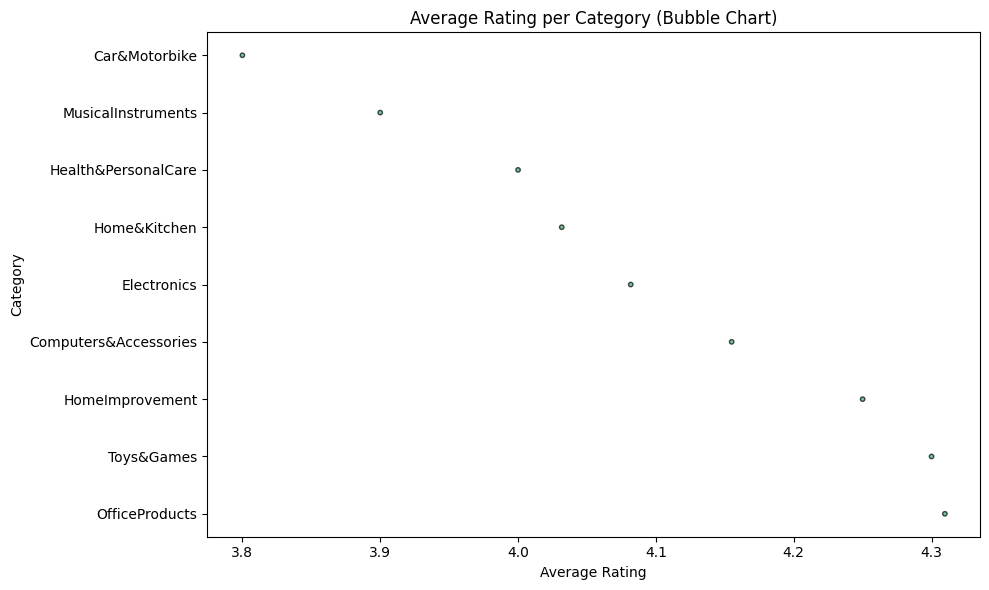

In [31]:
import psycopg2
import pandas as pd
conn=psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)
query="""SELECT regexp_replace(Category, '\|.*$', '') AS trimmed_category, AVG(CAST(rating AS FLOAT)) AS avg_rating
FROM amazon_sales
GROUP BY trimmed_category
ORDER BY avg_rating DESC;
"""
df=pd.read_sql(query,conn)
conn.close()
print(df)
# Count of products per category
counts = df['trimmed_category'].value_counts().reindex(df['trimmed_category'])
sizes = counts * 10  # scale bubbles

plt.figure(figsize=(10, 6))
plt.scatter(df['avg_rating'], df['trimmed_category'], s=sizes, color='mediumseagreen', alpha=0.7, edgecolors='black')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Average Rating per Category (Bubble Chart)')
plt.tight_layout()
plt.show()


Top-rated products (with at least 50 reviews to avoid bias)

             product_name  rating  rating_count
0  Instant Pot Air\nFrye…     4.8          3964
1  Swiffer Instant\nElec…     4.8         53803
2  FIGMENT Handheld\nMil…     4.7          1729
3  Zuvexa USB\nRechargea…     4.7            54
4  Sony Bravia 164 cm\n(…     4.7          5935
5   Campfire Spring Chef…     4.7          2591
6   Multifunctional 2 in…     4.7          2300
7  Spigen EZ Fit\nTemper…     4.7          7779
8  10k 8k 4k HDMI\nCable…     4.6          3664
9   Logitech Pebble M350…     4.6         10652


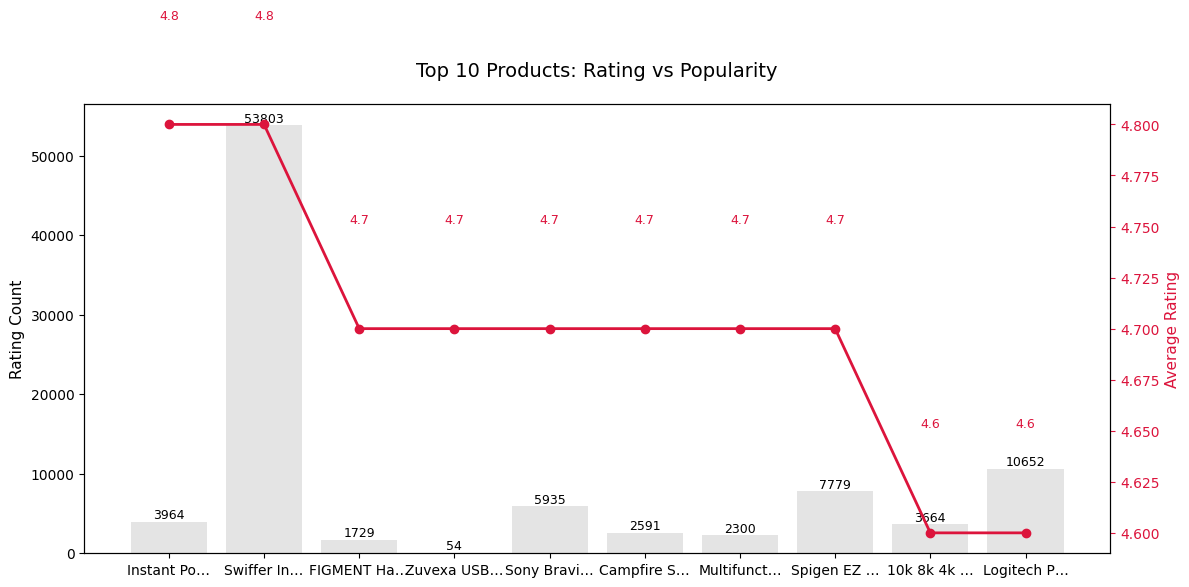

In [29]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
conn=psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)
query="""SELECT product_name, rating, rating_count
FROM amazon_sales
WHERE CAST(rating_count AS INT) >= 50
ORDER BY CAST(rating AS FLOAT) DESC
LIMIT 10;
"""

print(df)

# --- Clean ---
df['rating'] = df['rating'].astype(float)
df['rating_count'] = df['rating_count'].astype(int)

# 1️⃣ Trim + wrap product names neatly (break into multiple lines if long)
# Trim product names to max 20 characters for cleaner plotting
df['product_name'] = df['product_name'].apply(lambda x: (x[:10] + '…') if len(x) > 10 else x)


# --- Visualization ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# 2️⃣ Bar chart for rating_count
bars = ax1.bar(df['product_name'], df['rating_count'], color='lightgrey', alpha=0.6)
ax1.set_ylabel('Rating Count', fontsize=11)

# 3️⃣ Line + markers for rating
ax2 = ax1.twinx()
ax2.plot(df['product_name'], df['rating'], color='crimson', marker='o', linewidth=2, label='Average Rating')
ax2.set_ylabel('Average Rating', color='crimson', fontsize=11)
ax2.tick_params(axis='y', colors='crimson')

# 4️⃣ Rotate + wrap labels cleanly
plt.xticks(rotation=0, ha='center')
plt.title('Top 10 Products: Rating vs Popularity', fontsize=14, pad=20)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, df['rating_count'][i],
             ha='center', va='bottom', fontsize=9)

# Add rating annotations
for i, val in enumerate(df['rating']):
    ax2.text(i, val + 0.05, f'{val:.1f}', color='crimson', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Distribution of ratings

In [1]:
import psycopg2
import pandas as pd
import plotly.express as px

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)

# Run SQL query
query = """
SELECT rating, COUNT(*) AS count
FROM amazon_sales
GROUP BY rating
ORDER BY rating DESC;
"""
df = pd.read_sql(query, conn)
conn.close()

# Display the DataFrame
print(df)

# --- Interactive Visualization ---
fig = px.bar(
    df,
    x='rating',
    y='count',
    text='count',
    color='count',
    color_continuous_scale='Tealgrn',
    title='📦 Number of Products by Rating (Amazon Sales)',
)

# Customize layout for dark theme
fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=20, family='Arial', color='cyan'),
    xaxis_title='Rating',
    yaxis_title='Number of Products',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(size=13, color='white'),
)

# Show text labels above bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Display interactive chart
fig.show()


C:\Users\anshi\AppData\Local\Temp\ipykernel_222080\3379479974.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


    rating  count
0      5.0      3
1      4.8      3
2      4.7      6
3      4.6     17
4      4.5     75
5      4.4    123
6      4.3    230
7      4.2    228
8      4.1    244
9      4.0    181
10     3.9    123
11     3.8     86
12     3.7     42
13     3.6     35
14     3.5     26
15     3.4     10
16     3.3     16
17     3.2      2
18     3.1      4
19     3.0      4
20     2.9      1
21     2.8      2
22     2.6      1
23     2.3      1
24     2.0      1
25     0.0      1


C. Popular Products

Most reviewed products

In [2]:
import psycopg2
import pandas as pd
import plotly.graph_objects as go

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)

# Query top 10 products
query = """
SELECT product_name, rating_count
FROM amazon_sales
ORDER BY CAST(rating_count AS INT) DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
conn.close()

# Convert rating_count to numeric
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# --- Visualization: Lollipop Chart ---
fig = go.Figure()

# Add line stems
fig.add_trace(go.Scatter(
    x=df['rating_count'],
    y=df['product_name'],
    mode='lines',
    line=dict(color='lightgrey', width=3),
    showlegend=False
))

# Add lollipop markers
fig.add_trace(go.Scatter(
    x=df['rating_count'],
    y=df['product_name'],
    mode='markers+text',
    marker=dict(color='turquoise', size=12),
    text=df['rating_count'],
    textposition='middle right'
))

fig.update_layout(
    title='🏆 Top 10 Products by Rating Count (Lollipop Chart)',
    xaxis_title='Rating Count',
    yaxis_title='Product Name',
    template='plotly_dark',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    font=dict(size=13, color='white'),
    height=500
)

fig.show()


C:\Users\anshi\AppData\Local\Temp\ipykernel_222080\881854057.py:20: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Products with maximum revenue potential
Assuming revenue = discounted_price × rating_count

In [3]:
import psycopg2
import pandas as pd
import plotly.express as px

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)

# Query top 10 products by potential revenue
query = """
SELECT product_name, 
       CAST(discounted_price AS FLOAT) * CAST(rating_count AS INT) AS potential_revenue
FROM amazon_sales
ORDER BY potential_revenue DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
conn.close()

# Convert to numeric just to be safe
df['potential_revenue'] = pd.to_numeric(df['potential_revenue'], errors='coerce')

# --- Visualization: Treemap ---
fig = px.treemap(
    df,
    path=['product_name'],
    values='potential_revenue',
    color='potential_revenue',
    color_continuous_scale='Viridis',
    title='💰 Top 10 Products by Potential Revenue'
)

fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=22, color='cyan'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white')
)

fig.show()


C:\Users\anshi\AppData\Local\Temp\ipykernel_222080\2206080523.py:21: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



D. Category-level Insights

Category-wise revenue potential

In [5]:
import psycopg2
import pandas as pd
import plotly.express as px

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)

# SQL Query
query = """
SELECT category, 
       SUM(CAST(discounted_price AS FLOAT) * CAST(rating_count AS INT)) AS total_revenue
FROM amazon_sales
GROUP BY category
ORDER BY total_revenue DESC;
"""
df = pd.read_sql(query, conn)
conn.close()

# Convert to numeric
df['total_revenue'] = pd.to_numeric(df['total_revenue'], errors='coerce')

# --- Visualization: Donut Chart ---
fig = px.pie(
    df,
    names='category',
    values='total_revenue',
    hole=0.4,  # makes it a donut
    color_discrete_sequence=px.colors.sequential.Tealgrn,
    title='🛍️ Total Potential Revenue by Category'
)

fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=22, color='cyan'),
    font=dict(size=13, color='white'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    showlegend=True
)

fig.update_traces(textinfo='percent', hovertemplate='Category: %{label}<br>Revenue: ₹%{value:,.0f}')

fig.show()


C:\Users\anshi\AppData\Local\Temp\ipykernel_222080\1735551778.py:21: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



Category-wise average rating and reviews

In [6]:
import psycopg2
import pandas as pd
import plotly.express as px

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)

# SQL Query
query = """
SELECT category, 
       AVG(CAST(rating AS FLOAT)) AS avg_rating,
       AVG(CAST(rating_count AS INT)) AS avg_reviews
FROM amazon_sales
GROUP BY category
ORDER BY avg_rating DESC;
"""
df = pd.read_sql(query, conn)
conn.close()

# Convert numeric fields safely
df['avg_rating'] = pd.to_numeric(df['avg_rating'], errors='coerce')
df['avg_reviews'] = pd.to_numeric(df['avg_reviews'], errors='coerce')

# --- Visualization: Bubble Chart ---
fig = px.scatter(
    df,
    x='avg_rating',
    y='avg_reviews',
    size='avg_reviews',
    color='category',
    hover_name='category',
    size_max=60,
    color_discrete_sequence=px.colors.qualitative.Vivid,
    title='⭐ Average Rating vs Reviews by Category'
)

# --- Layout Styling ---
fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=22, color='cyan'),
    xaxis_title='Average Rating',
    yaxis_title='Average Review Count',
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(color='white'),
    height=550
)

# --- Improve Axis Formatting ---
fig.update_xaxes(range=[df['avg_rating'].min() - 0.2, df['avg_rating'].max() + 0.2])
fig.update_yaxes(showgrid=True)

fig.show()


C:\Users\anshi\AppData\Local\Temp\ipykernel_222080\114799323.py:22: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



E. Review Analysis (more advanced)

In [7]:
import psycopg2
import pandas as pd
import plotly.express as px

# Connect to PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database="Amazon",
    user="postgres",
    password="vit@123"
)

# Query: products with most “good” mentions
query = """
SELECT product_name, COUNT(*) AS review_count
FROM amazon_sales
WHERE LOWER(review_content) LIKE '%good%'
GROUP BY product_name
ORDER BY review_count DESC
LIMIT 10;
"""
df = pd.read_sql(query, conn)
conn.close()

# Convert to numeric
df['review_count'] = pd.to_numeric(df['review_count'], errors='coerce')

# --- Visualization ---
fig = px.bar(
    df,
    x='review_count',
    y='product_name',
    orientation='h',
    text='review_count',
    color='review_count',
    color_continuous_scale='Emrld',
    title='💬 Top 10 Products Most Mentioned as “Good”'
)

fig.update_layout(
    template='plotly_dark',
    title_font=dict(size=22, color='cyan'),
    font=dict(color='white'),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis=dict(categoryorder='total ascending'),
    height=500
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()


C:\Users\anshi\AppData\Local\Temp\ipykernel_222080\2536970076.py:22: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

